In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math as mt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch
import scipy
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import researchpy as rp

from IPython.display import display

In [2]:
dfcon = pd.read_excel('2022.9.13 publication rfp.xlsx',sheet_name='data_con')

dfcon_mean = dfcon.groupby('Promoter').mean()
dfcon_std = dfcon.groupby('Promoter').std()
dfcon_mean['ag_std'] = dfcon_std['Norm_RFP_Agro']
dfcon_mean['ec_std'] = dfcon_std['Norm_RFP_Ecoli']

xkcd_col = list(mcolors.XKCD_COLORS.values())

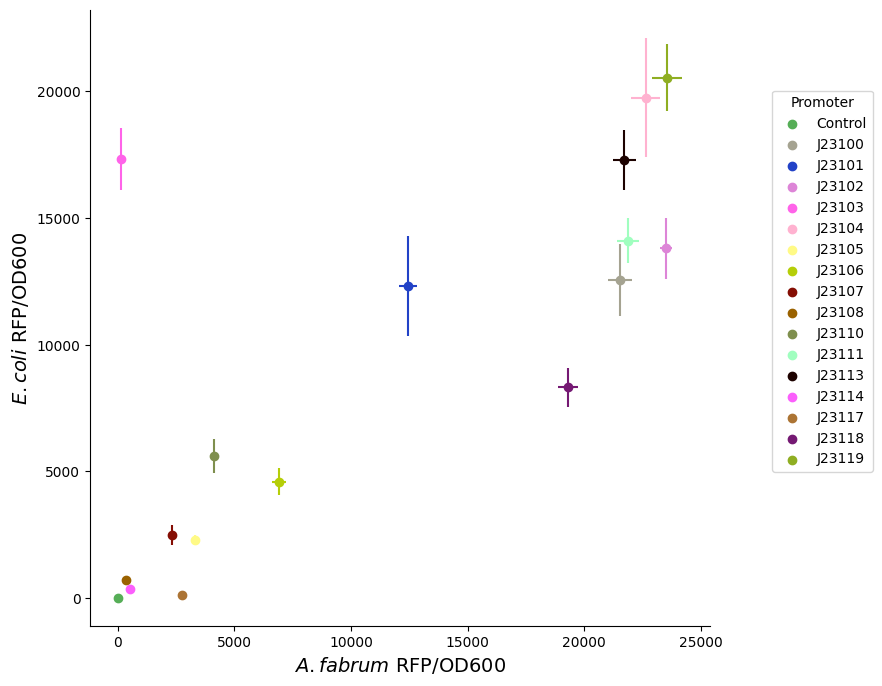

In [3]:
cnum=1
plt.figure(figsize=(8,8))
for row in dfcon_mean.iterrows():
    plt.scatter(row[1].Norm_RFP_Agro,row[1].Norm_RFP_Ecoli, color = xkcd_col[cnum])
    plt.errorbar(row[1].Norm_RFP_Agro,row[1].Norm_RFP_Ecoli,
                 xerr=row[1].ag_std,yerr=row[1].ec_std, color = xkcd_col[cnum])
    cnum=cnum+10

sns.despine(top=True,right=True)
plt.legend(dfcon_mean.index,loc=(1.1,0.25),title="Promoter")
plt.xlabel('$A. fabrum$ RFP/OD600',size=14)
plt.ylabel('$E. coli$ RFP/OD600',size=14)
plt.savefig('E.coli_Agro_Con_Invitro.png',format='png',dpi=300,bbox_inches='tight')

In [4]:
scipy.stats.spearmanr(dfcon_mean.Norm_RFP_Agro, dfcon_mean.Norm_RFP_Ecoli)

SpearmanrResult(correlation=0.7303921568627452, pvalue=0.0008698653219673867)

In [5]:
#constituitive in Arabidopsis
df_at_con = pd.read_excel('2021.9.15 at and nb agro.xlsx',sheet_name='data_at_con')
#df_at_con = df_at_con[df_at_con.Strain !='Leaf']

df_at_con['RFP_corr'] = df_at_con['RFP'] - 211.583333
df_at_con = df_at_con[df_at_con.Strain !='Leaf']
df_at_con.Strain = df_at_con.Strain.str.replace("p",'J23')

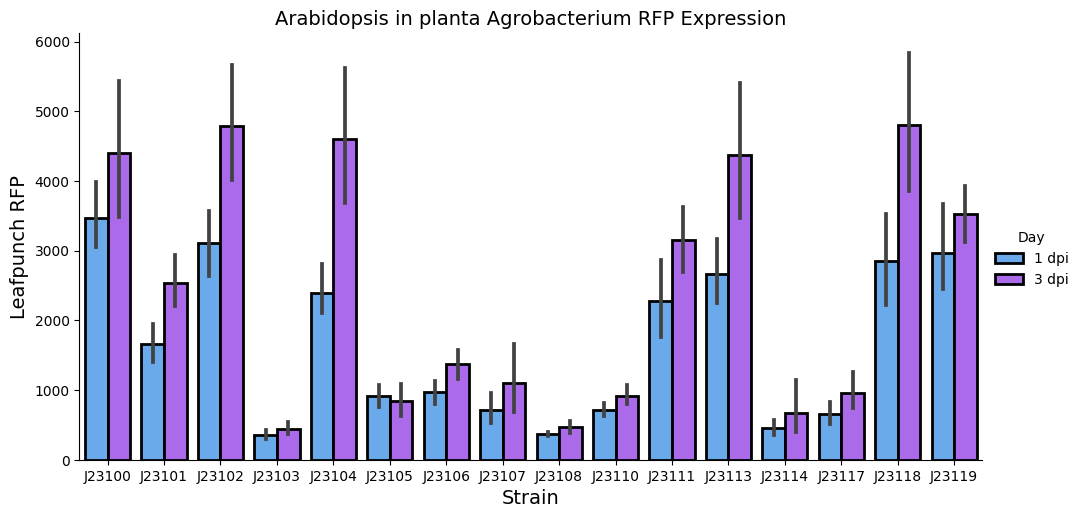

In [6]:
sns.catplot(x='Strain',y='RFP',hue='Day',data=df_at_con,kind='bar',palette='cool',
           edgecolor='black',linewidth=2,aspect=2)

plt.title('Arabidopsis in planta Agrobacterium RFP Expression',size=14)
plt.xlabel('Strain',size=14)
plt.ylabel('Leafpunch RFP',size=14)
plt.savefig('Arabidopsis_constituitiveRFP.png',format='png',dpi=300,bbox_inches='tight')

In [7]:
df_at_con[df_at_con.Day=='3 dpi'].groupby(['Strain','Day']).mean()
dfcon_mean['dpi3_Arabidopsis_mean'] = df_at_con[df_at_con.Day=='3 dpi'].groupby(['Strain']).mean()['RFP_corr']
dfcon_mean['dpi3_Arabidopsis_std'] = df_at_con[df_at_con.Day=='3 dpi'].groupby(['Strain']).std()['RFP_corr']

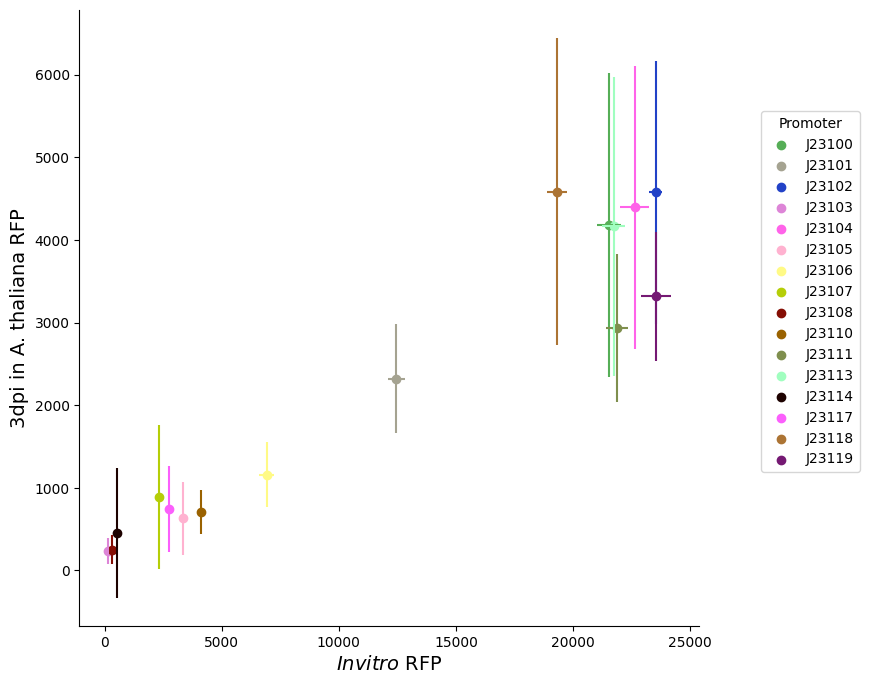

In [8]:
cnum=1
plt.figure(figsize=(8,8))
for row in dfcon_mean.iterrows():
    if row[0] != 'Control':
        plt.scatter(row[1].Norm_RFP_Agro,row[1].dpi3_Arabidopsis_mean, color = xkcd_col[cnum])
        plt.errorbar(row[1].Norm_RFP_Agro,row[1].dpi3_Arabidopsis_mean,
                 xerr=row[1].ag_std,yerr=row[1].dpi3_Arabidopsis_std, color = xkcd_col[cnum])
        cnum=cnum+10

sns.despine(top=True,right=True)
plt.legend(dfcon_mean.index[1:],loc=(1.1,0.25),title="Promoter")
plt.xlabel('$In vitro$ RFP',size=14)
plt.ylabel('3dpi in A. thaliana RFP',size=14)
plt.savefig('Arabidopsis_constituitiveRFP_v_invitro.png',format='png',dpi=300,bbox_inches='tight')

In [9]:
dfcon_mean = dfcon_mean.reset_index()
dfcon_mean=dfcon_mean[dfcon_mean.Promoter !='Control']

In [10]:
scipy.stats.spearmanr(dfcon_mean.Norm_RFP_Agro, dfcon_mean.dpi3_Arabidopsis_mean)

SpearmanrResult(correlation=0.8647058823529412, pvalue=1.544234049652656e-05)

In [11]:
df_nb_con = pd.read_excel('2021.9.15 at and nb agro.xlsx',sheet_name='new_nb')
#subtract background
df_nb_con['RFP'] = df_nb_con['RFP'] - 301

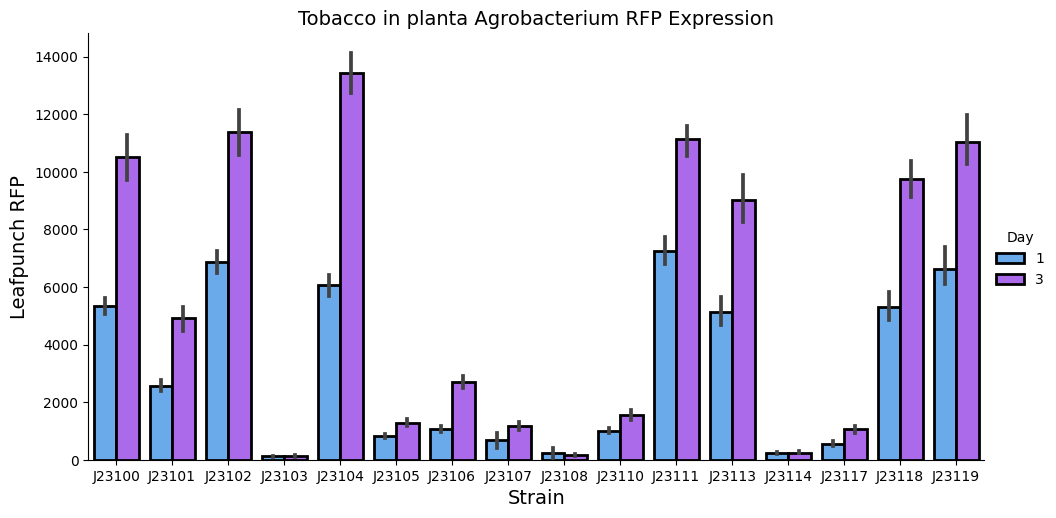

In [12]:
sns.catplot(x='Strain',y='RFP',hue='Day',data=df_nb_con,kind='bar',palette='cool',
           edgecolor='black',linewidth=2,aspect=2,
            order=['J23100', 'J23101', 'J23102', 'J23103', 'J23104', 'J23105',
       'J23106', 'J23107', 'J23108', 'J23110', 'J23111', 'J23113', 'J23114',
       'J23117', 'J23118', 'J23119'])

plt.title('Tobacco in planta Agrobacterium RFP Expression',size=14)
plt.xlabel('Strain',size=14)
plt.ylabel('Leafpunch RFP',size=14)
plt.savefig('Tobacco_constituitiveRFP.png',format='png',dpi=300,bbox_inches='tight')

In [13]:
df_nb_con[df_nb_con.Day==3].groupby(['Strain']).mean()['RFP']
dfcon_mean = dfcon_mean.set_index('Promoter')
dfcon_mean['dpi3_Tobacco_mean'] = df_nb_con[df_nb_con.Day==3].groupby(['Strain']).mean()['RFP']
dfcon_mean['dpi3_Tobacco_std'] = df_nb_con[df_nb_con.Day==3].groupby(['Strain']).std()['RFP']
dfcon_mean = dfcon_mean.reset_index()
dfcon_mean['Strain'] = dfcon_mean['Promoter']
dfcon_mean.head()

,Promoter,OD_Agro,RFP_Agro,Norm_RFP_Agro,OD_Ecoli,RFP_Ecoli,Norm_RFP_Ecoli,ag_std,ec_std,dpi3_Arabidopsis_mean,dpi3_Arabidopsis_std,dpi3_Tobacco_mean,dpi3_Tobacco_std,Strain
0,J23100,0.914000,19684.625,21542.875,0.808750,10181.500,12566.375,503.303214,1423.808869,4185.583334,1839.974102,10527.020833,1687.989843,J23100
1,J23101,0.856625,10665.125,12449.750,0.726875,8912.750,12311.500,366.956498,1971.774255,2321.916667,662.298271,4908.895833,1068.504274,J23101
2,J23102,0.907125,21339.125,23523.125,0.714000,9959.000,13801.375,257.465358,1196.463711,4579.583334,1591.685204,11364.208333,1987.852698,J23102
3,J23103,0.767000,105.625,137.750,0.695500,12064.750,17346.000,8.137216,1222.698655,235.000000,158.744768,137.236111,95.240998,J23103
4,J23104,0.857875,19402.500,22634.875,0.736875,14639.625,19753.000,621.588848,2360.185586,4395.666667,1711.243627,13423.638889,1720.933585,J23104


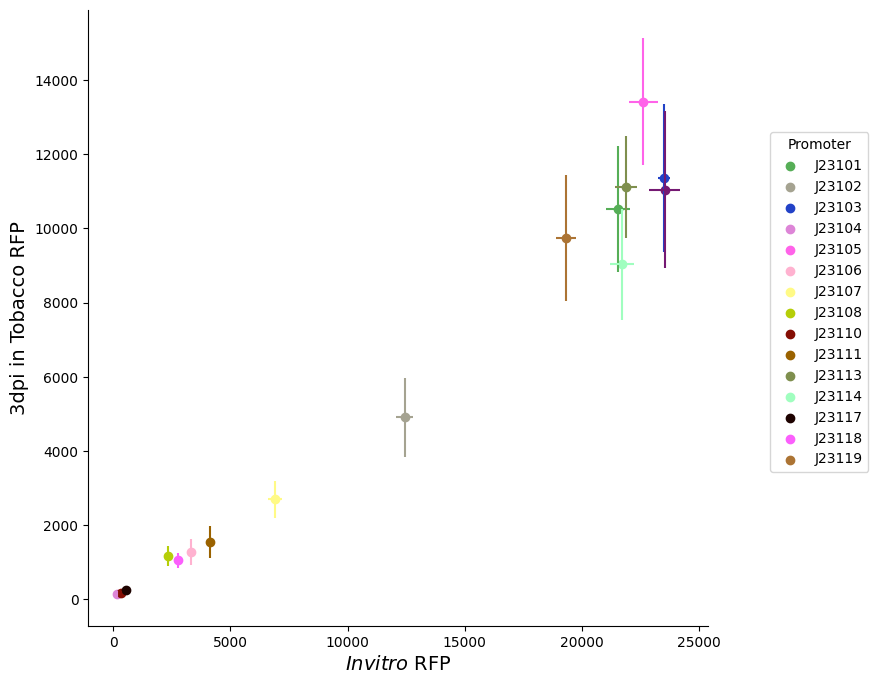

In [14]:
cnum=1
plt.figure(figsize=(8,8))
for row in dfcon_mean.iterrows():
    if row[0] != 'Control':
        plt.scatter(row[1].Norm_RFP_Agro,row[1].dpi3_Tobacco_mean, color = xkcd_col[cnum])
        plt.errorbar(row[1].Norm_RFP_Agro,row[1].dpi3_Tobacco_mean,
                 xerr=row[1].ag_std,yerr=row[1].dpi3_Tobacco_std, color = xkcd_col[cnum])
        cnum=cnum+10

sns.despine(top=True,right=True)
plt.legend(dfcon_mean.Promoter[1:],loc=(1.1,0.25),title="Promoter")
plt.xlabel('$In vitro$ RFP',size=14)
plt.ylabel('3dpi in Tobacco RFP',size=14)
plt.savefig('Tobacco_constituitiveRFP_v_invitro.png',format='png',dpi=300,bbox_inches='tight')

In [15]:
scipy.stats.spearmanr(dfcon_mean.Norm_RFP_Agro, dfcon_mean.dpi3_Tobacco_mean)

SpearmanrResult(correlation=0.9676470588235294, pvalue=9.132894807195552e-10)

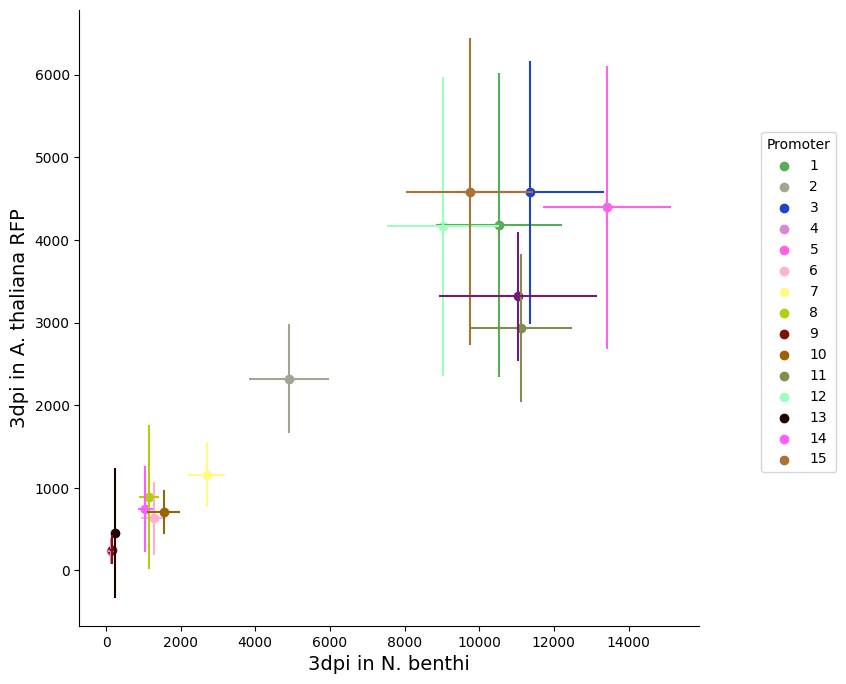

In [16]:
cnum=1
plt.figure(figsize=(8,8))
for row in dfcon_mean.iterrows():
    if row[0] != 'Control':
        plt.scatter(row[1].dpi3_Tobacco_mean,row[1].dpi3_Arabidopsis_mean, color = xkcd_col[cnum])
        plt.errorbar(row[1].dpi3_Tobacco_mean,row[1].dpi3_Arabidopsis_mean,
                 xerr=row[1].dpi3_Tobacco_std,yerr=row[1].dpi3_Arabidopsis_std, color = xkcd_col[cnum])
        cnum=cnum+10

sns.despine(top=True,right=True)
plt.legend(dfcon_mean.index[1:],loc=(1.1,0.25),title="Promoter")
plt.xlabel('3dpi in N. benthi',size=14)
plt.ylabel('3dpi in A. thaliana RFP',size=14)
plt.savefig('Tobacco_constituitiveRFP_v_At_constituitiveRFP.png',format='png',dpi=300,bbox_inches='tight')

In [17]:
scipy.stats.spearmanr(dfcon_mean.dpi3_Arabidopsis_mean, dfcon_mean.dpi3_Tobacco_mean)

SpearmanrResult(correlation=0.8970588235294116, pvalue=2.4923759658858677e-06)

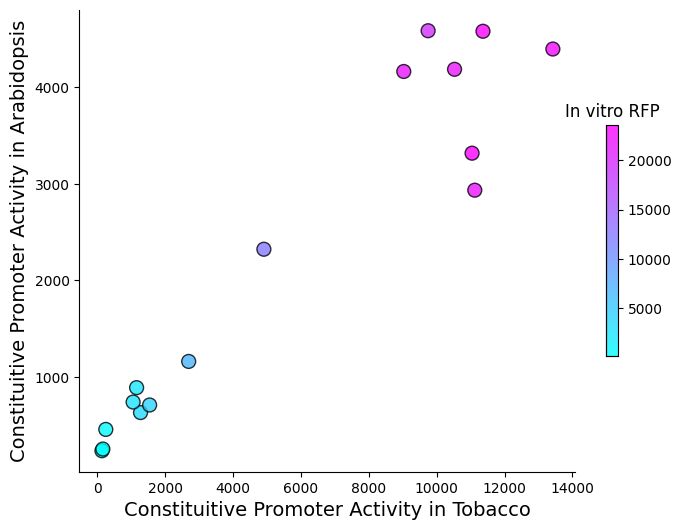

In [18]:
plt.figure(figsize=(8,6))

plt.scatter(dfcon_mean[dfcon_mean.Strain!="Control"].dpi3_Tobacco_mean,
            dfcon_mean[dfcon_mean.Strain!="Control"].dpi3_Arabidopsis_mean,
            alpha = .8,cmap="cool",edgecolors= "black",s=100,
            c = dfcon_mean[dfcon_mean.Strain!="Control"].Norm_RFP_Agro,)
cbar = plt.colorbar(shrink=0.5)
plt.xlabel('Constituitive Promoter Activity in Tobacco',size=14)
plt.ylabel('Constituitive Promoter Activity in Arabidopsis',size=14)

cbar.ax.set_title('In vitro RFP')
sns.despine()
plt.savefig('constitutive_at_tob_invitro.png',format='png',dpi=300,bbox_inches='tight')

In [19]:
df_ind = pd.read_excel('2022.9.13 publication rfp.xlsx',sheet_name='data_ind2')

#dftobacco_ind=pd.read_excel('2021.6.12 in tobacco inducible.xlsx',sheet_name='day1')
#dftobacco_ind=dftobacco_ind.melt(id_vars=['Plasmid','Conc','Day','Cond'])
#dftobacco_ind.to_csv('2022.11.3_tobacco_rfp_induction.csv')

df_plant_ind = pd.read_excel('2021.9.15 at and nb agro.xlsx',sheet_name='Plant Inducible')
#df_plant_ind = df_plant_ind[df_plant_ind.Promoter.isin(['LacI','TetR','NahR','Jungle Express','CuO'])]

In [20]:
norm_rfps = []
for row in df_plant_ind.iterrows():
    if row[1].Plant == 'Tobacco':
        norm_rfps.append(row[1].RFP - 401)
    if row[1].Plant == 'Arabidopsis':
        norm_rfps.append(row[1].RFP - 311)

df_plant_ind['Norm_RFP'] = norm_rfps
df_plant_ind = df_plant_ind[df_plant_ind.Promoter != "Control"]
df_plant_ind.head()

,Plant,Promoter,Conc,Day,RFP,Norm_RFP
9,Tobacco,CuO,None,1,694,293
10,Tobacco,CuO,None,1,804,403
11,Tobacco,CuO,None,1,516,115
12,Tobacco,CuO,Mid,1,412,11
13,Tobacco,CuO,Mid,1,439,38


(0.0, 8000.0)

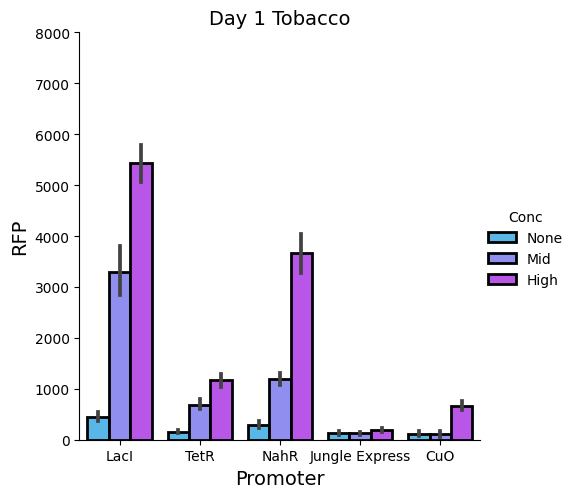

In [21]:
sns.catplot(x='Promoter',y='Norm_RFP',hue='Conc',data=df_plant_ind.query('Plant == "Tobacco" & Day == 1'),
            col='Day',col_wrap=1,kind='bar',edgecolor='black',linewidth=2,palette='cool',
            aspect=1,order=['LacI','TetR','NahR','Jungle Express','CuO'])

plt.xlabel('Promoter',size=14)
plt.ylabel('RFP',size=14)
plt.title('Day 1 Tobacco',size=14)
plt.ylim(0,8000)

# plt.savefig('day1tobacco_indRFP.png',format='png',dpi=300,bbox_inches='tight')

(0.0, 8000.0)

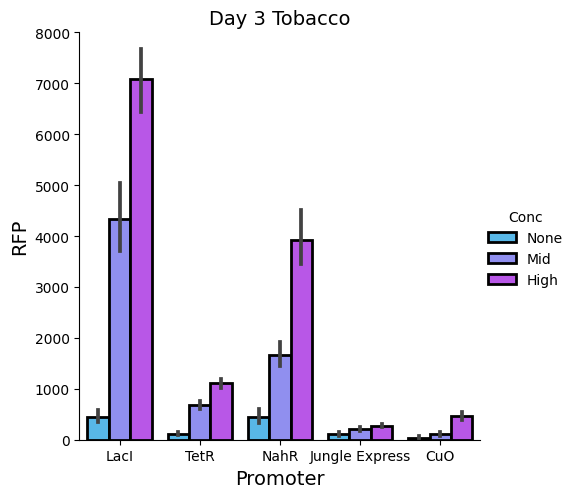

In [22]:
sns.catplot(x='Promoter',y='Norm_RFP',hue='Conc',data=df_plant_ind.query('Plant == "Tobacco" & Day == 3'),
            col='Day',col_wrap=1,kind='bar',edgecolor='black',linewidth=2,palette='cool',
            aspect=1,order=['LacI','TetR','NahR','Jungle Express','CuO'])

plt.xlabel('Promoter',size=14)
plt.ylabel('RFP',size=14)
plt.title('Day 3 Tobacco',size=14)
plt.ylim(0,8000)

# plt.savefig('day3tobacco_indRFP.png',format='png',dpi=300,bbox_inches='tight')

(0.0, 8000.0)

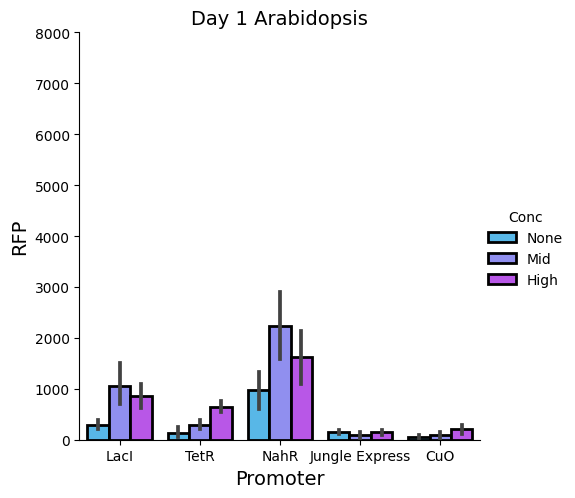

In [23]:
sns.catplot(x='Promoter',y='Norm_RFP',hue='Conc',data=df_plant_ind.query('Plant == "Arabidopsis" & Day == 1'),
            col='Day',col_wrap=1,kind='bar',edgecolor='black',linewidth=2,palette='cool',
            aspect=1,order=['LacI','TetR','NahR','Jungle Express','CuO'])

plt.xlabel('Promoter',size=14)
plt.ylabel('RFP',size=14)
plt.title('Day 1 Arabidopsis',size=14)
plt.ylim(0,8000)

# plt.savefig('day1arabidopsis_indRFP.png',format='png',dpi=300,bbox_inches='tight')

(0.0, 8000.0)

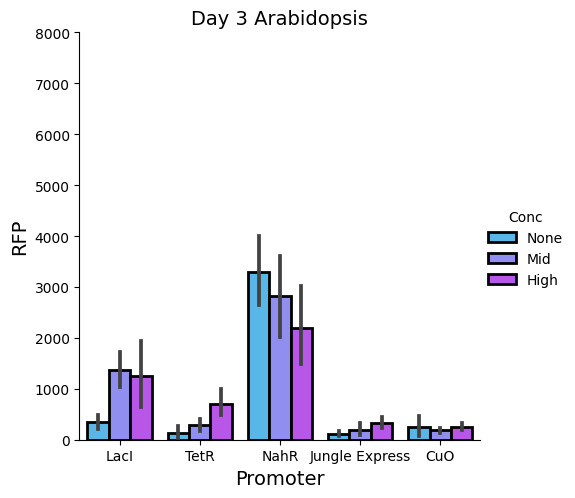

In [24]:
sns.catplot(x='Promoter',y='Norm_RFP',hue='Conc',data=df_plant_ind.query('Plant == "Arabidopsis" & Day == 3'),
            col='Day',col_wrap=1,kind='bar',edgecolor='black',linewidth=2,palette='cool',
            aspect=1,order=['LacI','TetR','NahR','Jungle Express','CuO'])

plt.xlabel('Promoter',size=14)
plt.ylabel('RFP',size=14)
plt.title('Day 3 Arabidopsis',size=14)
plt.ylim(0,8000)

# plt.savefig('day3arabidopsis_indRFP.png',format='png',dpi=300,bbox_inches='tight')

In [25]:
df_plant_ind_fig=pd.read_excel('2021.9.15 at and nb agro.xlsx',sheet_name='plant_ind_fig')

norm_rfps2 = []
for row in df_plant_ind_fig.iterrows():
    if row[1].Plant == 'Tobacco':
        norm_rfps2.append(row[1].RFP - 401)
    if row[1].Plant == 'Arabidopsis':
        norm_rfps2.append(row[1].RFP - 311)
    if row[1].Plant == 'In vitro':
        norm_rfps2.append(row[1].RFP)

df_plant_ind_fig['Norm_RFP'] = norm_rfps2
df_plant_ind_fig['RFP_log'] = df_plant_ind_fig.Norm_RFP.apply(np.log2)

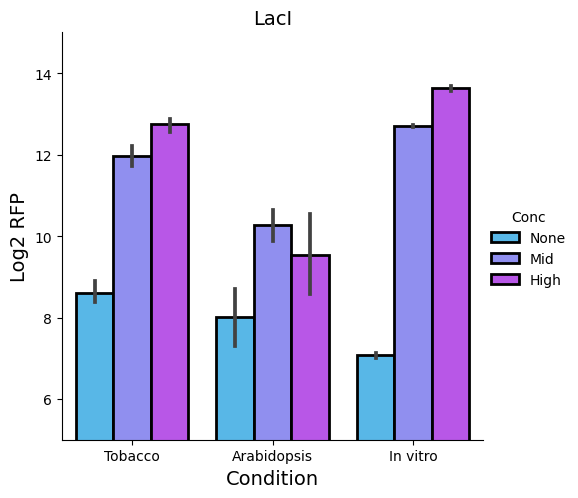

In [26]:
sns.catplot(x='Plant',y='RFP_log',hue='Conc',
            data=df_plant_ind_fig.query('Promoter == "LacI" & Day == 3'),
            col='Day',col_wrap=1,kind='bar',edgecolor='black',linewidth=2,palette='cool',
            aspect=1)

plt.xlabel('Condition',size=14)
plt.ylabel('Log2 RFP',size=14)
plt.title('LacI',size=14)
plt.ylim(5.0,15)
plt.savefig('lacI_ind_fig.png',format='png',dpi=300,bbox_inches='tight')

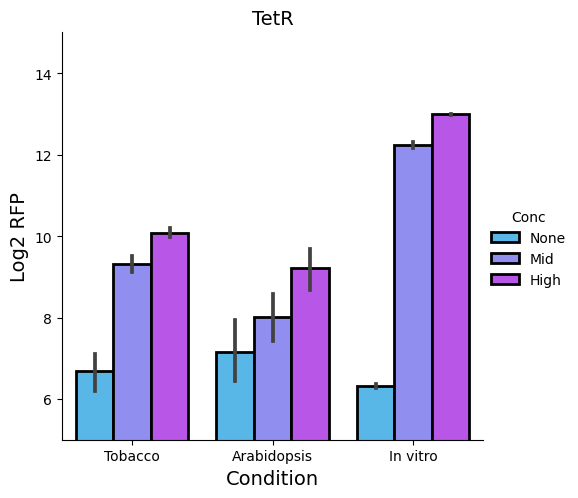

In [27]:
sns.catplot(x='Plant',y='RFP_log',hue='Conc',
            data=df_plant_ind_fig.query('Promoter == "TetR" & Day == 3'),
            col='Day',col_wrap=1,kind='bar',edgecolor='black',linewidth=2,palette='cool',
            aspect=1)

plt.xlabel('Condition',size=14)
plt.ylabel('Log2 RFP',size=14)
plt.title('TetR',size=14)
plt.ylim(5.0,15)
plt.savefig('tetR_ind_fig.png',format='png',dpi=300,bbox_inches='tight')

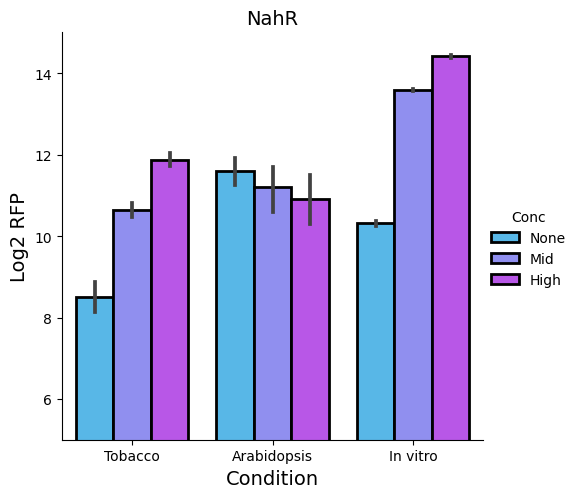

In [28]:
sns.catplot(x='Plant',y='RFP_log',hue='Conc',
            data=df_plant_ind_fig.query('Promoter == "NahR" & Day == 3'),
            col='Day',col_wrap=1,kind='bar',edgecolor='black',linewidth=2,palette='cool',
            aspect=1)

plt.xlabel('Condition',size=14)
plt.ylabel('Log2 RFP',size=14)
plt.title('NahR',size=14)
plt.ylim(5.0,15)
plt.savefig('nahR_ind_fig.png',format='png',dpi=300,bbox_inches='tight')

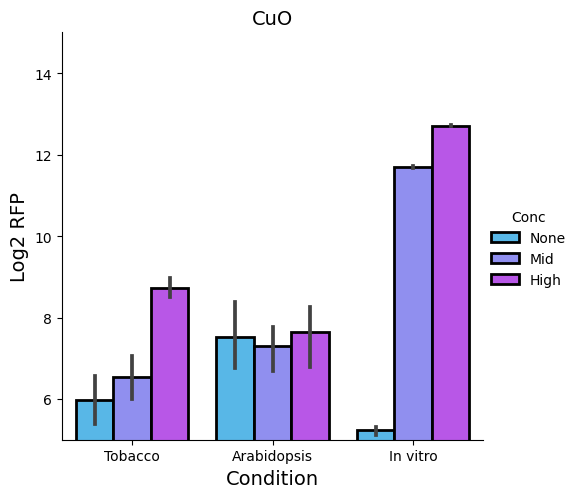

In [29]:
sns.catplot(x='Plant',y='RFP_log',hue='Conc',
            data=df_plant_ind_fig.query('Promoter == "CuO" & Day == 3'),
            col='Day',col_wrap=1,kind='bar',edgecolor='black',linewidth=2,palette='cool',
            aspect=1)

plt.xlabel('Condition',size=14)
plt.ylabel('Log2 RFP',size=14)
plt.title('CuO',size=14)
plt.ylim(5.0,15)
plt.savefig('cuO_ind_fig.png',format='png',dpi=300,bbox_inches='tight')

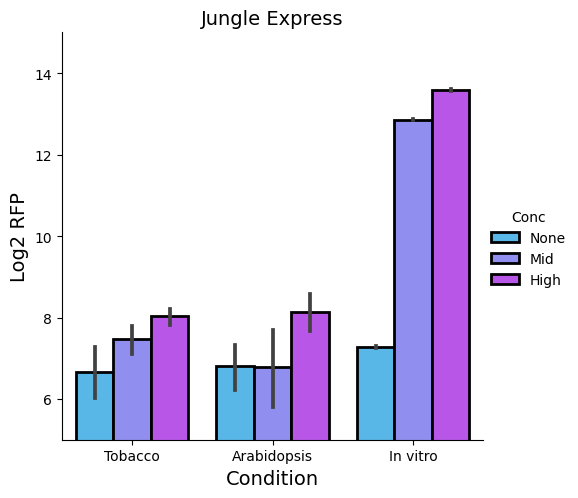

In [30]:
sns.catplot(x='Plant',y='RFP_log',hue='Conc',
            data=df_plant_ind_fig.query('Promoter == "Jungle Express" & Day == 3'),
            col='Day',col_wrap=1,kind='bar',edgecolor='black',linewidth=2,palette='cool',
            aspect=1)

plt.xlabel('Condition',size=14)
plt.ylabel('Log2 RFP',size=14)
plt.title('Jungle Express',size=14)
plt.ylim(5.0,15)
plt.savefig('JE_ind_fig.png',format='png',dpi=300,bbox_inches='tight')

# fig1 virE con data


In [31]:
dfecon = pd.read_excel('2022.3.28 virE.xlsx',sheet_name='data')
dfecon['GFP_log'] = dfecon.GFP.apply(np.log2)
dfecon = dfecon.dropna()
dfecon.Strain = dfecon.Strain.str.replace("p",'J23')

dfeconsum=rp.summary_cont(dfecon['GFP'].groupby(dfecon['Strain']))

compdfecon = mc.MultiComparison(dfecon['GFP'], dfecon['Strain'])
tbldfecon, a1dfecon, a2dfecon = compdfecon.allpairtest(stats.ttest_ind, method= "bonf")
# print(tbldfecon)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'WT'),
  Text(1, 0, 'ΔvirE12'),
  Text(2, 0, 'J23114'),
  Text(3, 0, 'J23117'),
  Text(4, 0, 'J23101'),
  Text(5, 0, 'J23100'),
  Text(6, 0, 'J23111'),
  Text(7, 0, 'Leaf')])

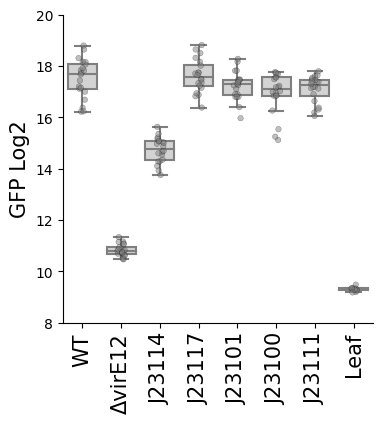

In [32]:
my_ko_pal = {Strain: "lightgrey" for Strain in dfecon.Strain.unique()}

plt.figure(figsize=(4,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfecon,palette=my_ko_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfecon,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
# plt.savefig('virE_con_fig1.png',kind='png',dpi=300,bbox_inches='tight')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'ΔvirE12'),
  Text(1, 0, 'J23114'),
  Text(2, 0, 'J23117'),
  Text(3, 0, 'J23101'),
  Text(4, 0, 'J23100'),
  Text(5, 0, 'J23111')])

<Figure size 400x400 with 0 Axes>

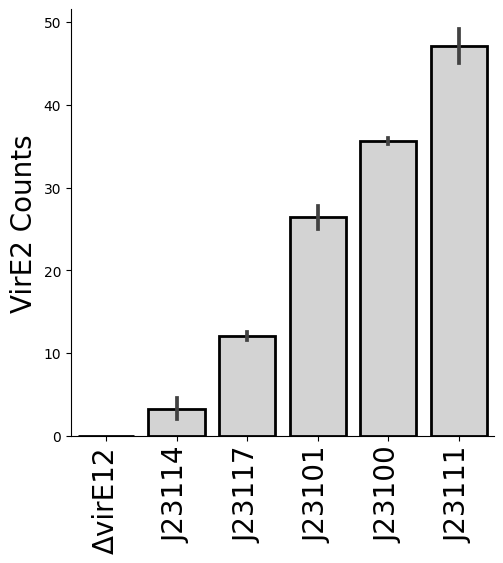

In [33]:
#virE con proteomics
df_virEprot = pd.read_excel('virE_comp_vironly.xlsx',sheet_name='data_E')

df_virEprot=df_virEprot[df_virEprot.Strain.isin(['ΔvirE12', 'ΔvirE12 p100', 'ΔvirE12 p101',
       'ΔvirE12 p111', 'ΔvirE12 p114', 'ΔvirE12 p117'])]
df_virEprot.Strain = df_virEprot.Strain.str.replace("ΔvirE12 p",'J23')

my_ko_pal = {Strain: "lightgrey" for Strain in df_virEprot.Strain.unique()}

plt.figure(figsize=(4,4))

sns.catplot(x='Strain',y='Count',data=df_virEprot[df_virEprot.Protein=='virE2'],palette=my_ko_pal,
           kind='bar',edgecolor='black',linewidth=2,
           order=['ΔvirE12', 'J23114','J23117','J23101', 'J23100',
       'J23111'])

sns.despine(top=True, right=True)
plt.xlabel('')
plt.ylabel('VirE2 Counts',fontsize=20)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=20, rotation=90)
# plt.savefig('virE_conprot_fig1.png',kind='png',dpi=300,bbox_inches='tight')


In [34]:
#virE inducible fig1
dfeind = pd.read_excel('2022.5.2 induc virE vire123 comp.xlsx',sheet_name='data')
dfeind = dfeind[dfeind.Plant != "Empty"]
dfeind['GFP_log'] = dfeind.GFP.apply(np.log2)
dfeind = dfeind.dropna()
dfeind.Strain = dfeind.Strain.str.replace("B1S",'LacI')
dfeind.Strain = dfeind.Strain.str.replace("B2S",'TetR')
dfeind.Strain = dfeind.Strain.str.replace("B3S",'NahR')
dfeind.Strain = dfeind.Strain.str.replace("B5S",'Jungle Express')
dfeind.Strain = dfeind.Strain.str.replace("B6S",'CuO')
dfeind['ID'] = dfeind.Strain + dfeind.Complement

dfeindsum=rp.summary_cont(dfeind['GFP'].groupby(dfeind['ID']))


In [35]:
compdfeind = mc.MultiComparison(dfeind['GFP'], dfeind['ID'])
tbldfeind, a1dfeind, a2dfeind = compdfeind.allpairtest(stats.ttest_ind, method= "bonf")
# print(tbldfeind)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

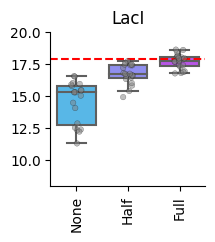

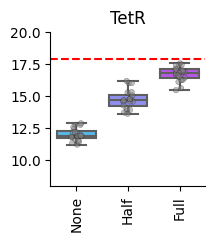

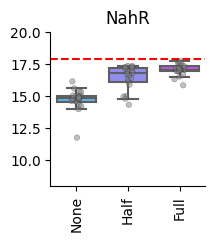

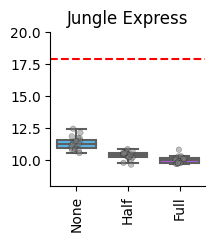

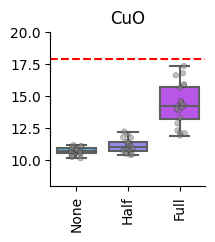

In [36]:
#plot the WT line
for strain in dfeind.Strain.unique():
    temp_df = dfeind[dfeind.Strain == strain]
    
    plt.figure(figsize=(2,2))
    sns.boxplot(x="Complement", y="GFP_log", data=temp_df,palette='cool',
            width=.75,showfliers=False)

    # Add in points to show each observation
    sns.stripplot(x="Complement", y="GFP_log", data=temp_df,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

    sns.despine(top=True, right=True)
    plt.legend(loc=(1,.7))
    plt.xticks(rotation=90)
    plt.axhline(y = np.log2(246477.70), color = 'r', linestyle = 'dashed')
    plt.ylim(8,20)
    plt.title(strain)
    plt.legend(loc=(1,.7),)
    plt.xlabel('')
    plt.ylabel('',fontsize=15)
    plt.xticks(rotation=90)
    plt.ylim(8,20)
    plt.legend([],[], frameon=False)
    plt.savefig('%s_agro_ind_fig1.png'% strain,dpi=300,bbox_inches='tight')

/tmp/ipykernel_276486/2768195278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB1S",'LacI')
/tmp/ipykernel_276486/2768195278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfind.Strain = dfind.Strain.str.replace("ΔvirE12 pB2S",'TetR')
/tmp/ipykernel_276486/2768195278.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

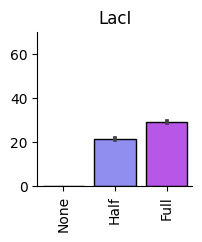

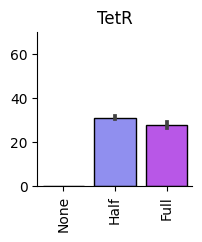

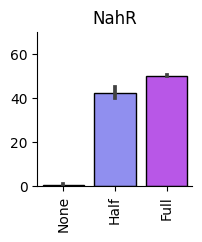

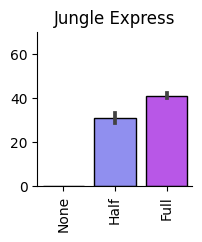

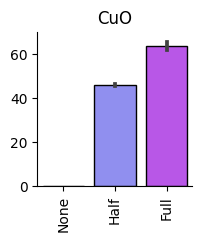

In [38]:
#KO Data
dfko = pd.read_excel('2022.5.30 vir KO.xlsx',sheet_name='data')
dfko['GFP_log'] = dfko.GFP.apply(np.log2)
dfko = dfko.dropna()

dfkosum=rp.summary_cont(dfko['GFP'].groupby(dfko['Strain']))

compko = mc.MultiComparison(dfko['GFP'], dfko['Strain'])
tblko, a1ko, a2ko = compko.allpairtest(stats.ttest_ind, method= "bonf")
# print(tblko)

dfko_virb=dfko[dfko.Strain.isin(['WT', 'ΔvirB1-11', 'ΔvirC12', 'ΔvirD12',
       'ΔvirD3', 'ΔvirD4', 'ΔvirD5', 'ΔvirE12', 'ΔvirE3', 'ΔvirF',
       'ΔvirH1', 'ΔvirH2', 'ΔvirK'])]

kosiglist=['WT','ΔvirD3', 'ΔvirF']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'WT'),
  Text(1, 0, 'ΔvirC12'),
  Text(2, 0, 'ΔvirD12'),
  Text(3, 0, 'ΔvirD3'),
  Text(4, 0, 'ΔvirD4'),
  Text(5, 0, 'ΔvirD5'),
  Text(6, 0, 'ΔvirE12'),
  Text(7, 0, 'ΔvirE3'),
  Text(8, 0, 'ΔvirF'),
  Text(9, 0, 'ΔvirH1'),
  Text(10, 0, 'ΔvirH2'),
  Text(11, 0, 'ΔvirK')])

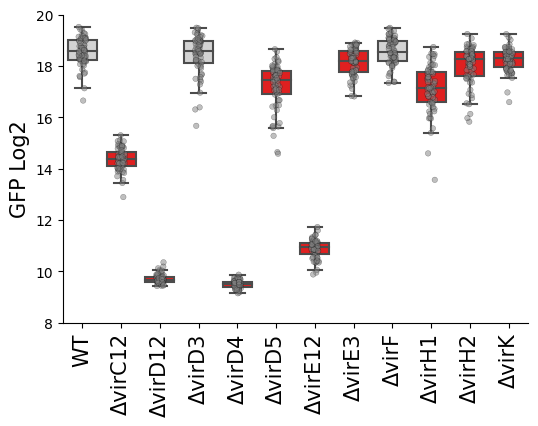

In [39]:
my_ko_pal = {Strain: "lightgrey" if Strain in kosiglist else "red" for Strain in dfko.Strain.unique()}

plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfko_virb,palette=my_ko_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfko_virb,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
# plt.savefig('fig2B_patent.png',dpi=300,bbox_inches='tight')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


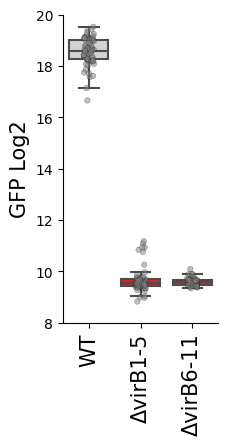

In [40]:
my_ko_pal = {Strain: "lightgrey" if Strain in kosiglist else "red" for Strain in dfko.Strain.unique()}

plt.figure(figsize=(2,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfko[dfko.Strain.isin(['WT','ΔvirB1-5', 'ΔvirB6-11'])],
            palette=my_ko_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfko[dfko.Strain.isin(['WT','ΔvirB1-5', 'ΔvirB6-11'])],
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.savefig('figS6A_patent.png',dpi=300,bbox_inches='tight')



In [41]:
#complement with p117 data
df117comp = pd.read_excel('2022.8.8 con 117 tobacco.xlsx',sheet_name='data')
df117comp['GFP_log'] = df117comp.GFP.apply(np.log2)
df117comp = df117comp.dropna()

df117compsum=rp.summary_cont(df117comp['GFP'].groupby(df117comp['Strain']))

comp117 = mc.MultiComparison(df117comp['GFP'], df117comp['Strain'])
tbl117, a1117, a2117 = comp117.allpairtest(stats.ttest_ind, method= "bonf")
print(tbl117)

ko117siglist=['WT', 'ΔvirC12', 'ΔvirD12', 'ΔvirD3', 'ΔvirE12', 'ΔvirE3', 'ΔvirF', 'ΔvirH1',
       'ΔvirH2']

df117comp_b = df117comp[df117comp.Strain.isin(['WT', 'ΔvirB1-11', 'ΔvirC12', 'ΔvirD12',
       'ΔvirD3', 'ΔvirD4', 'ΔvirD5', 'ΔvirE12', 'ΔvirE3', 'ΔvirF',
       'ΔvirH1', 'ΔvirH2', 'ΔvirK'])]



Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
  group1    group2    stat    pval  pval_corr reject
----------------------------------------------------
       WT  ΔvirB1-5  15.3295    0.0       0.0   True
       WT ΔvirB6-11   15.624    0.0       0.0   True
       WT   ΔvirC12   1.3403 0.1826       1.0  False
       WT   ΔvirD12  -0.4303 0.6677       1.0  False
       WT    ΔvirD3   2.8095 0.0058    0.5237  False
       WT    ΔvirD4   8.8969    0.0       0.0   True
       WT    ΔvirD5   3.7521 0.0003    0.0242   True
       WT   ΔvirE12   2.9354  0.004    0.3604  False
       WT    ΔvirE3   0.3936 0.6945       1.0  False
       WT     ΔvirF   0.0684 0.9456       1.0  False
       WT    ΔvirH1  -0.1659 0.8685       1.0  False
       WT    ΔvirH2  -0.2798 0.7801       1.0  False
       WT     ΔvirK    9.779    0.0       0.0   True
 ΔvirB1-5 ΔvirB6-11   1.1941 0.2347       1.0  False
 ΔvirB1-5   ΔvirC12 -15.9949    0.0       0.0   True
 Δvi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


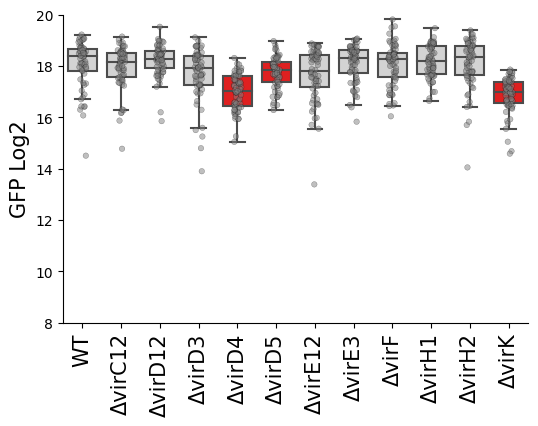

In [42]:
my_ko117_pal = {Strain: "lightgrey" if Strain in ko117siglist else "red" for Strain in dfko.Strain.unique()}


plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=df117comp_b,palette=my_ko117_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=df117comp_b,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.savefig('fig2C_patent.png',dpi=300,bbox_inches='tight')

In [43]:
dfko_virb['data'] = 'Deletion'
df117comp_b['data'] = 'Complement'

df_ko_comp = pd.concat([dfko_virb,df117comp_b])

/tmp/ipykernel_276486/2937892593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfko_virb['data'] = 'Deletion'
/tmp/ipykernel_276486/2937892593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df117comp_b['data'] = 'Complement'


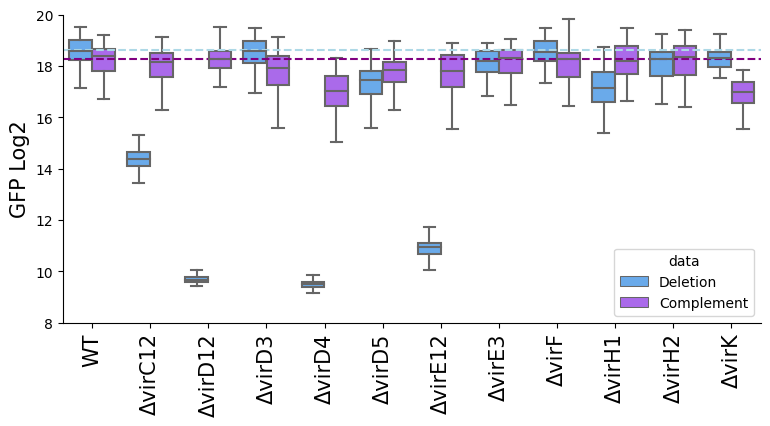

In [44]:
plt.figure(figsize=(9,4))
g = sns.boxplot(data=df_ko_comp,x='Strain',y='GFP_log',hue='data',showfliers=False,palette='cool',)
sns.despine(top=True, right=True)
#117 compe line 319949.3438
plt.axhline(y = np.log2(319949.3438), color = 'purple', linestyle = 'dashed')
#wt comp line 408382.4375
plt.axhline(y = np.log2(408382.4375), color = 'lightblue', linestyle = 'dashed')
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.ylim(8,20)
plt.xticks(fontsize=15, rotation=90)
plt.savefig('fig2b_patent.pdf',dpi=300,bbox_inches='tight')

In [45]:
#complement with B1S data
df = pd.read_excel('2022.6.6 bis comps 1.xlsx',sheet_name='data')
df['GFP_log'] = df.GFP.apply(np.log2)
df['ID'] = df.Strain + "_" + df.Induction
df2 = pd.read_excel('2022.6.13 bis comps 2.xlsx',sheet_name='data')
df2 = df2[df2.Strain != "Empty"]
df2['GFP_log'] = df2.GFP.apply(np.log2)
df2['ID'] = df2.Strain + "_" + df2.Induction
dfB1S=pd.concat([df,df2])
dfB1S.replace(to_replace="2mM",
           value="2.0mM",inplace=True)

dfB1Ssum=rp.summary_cont(dfB1S['GFP'].groupby(dfB1S['ID']))

dfB1S_plot = dfB1S[dfB1S.Strain.isin(['ΔvirB1-5', 'ΔvirB6-11', 'ΔvirC12', 'ΔvirD12', 'ΔvirE12',
       'ΔvirD3', 'ΔvirD4', 'ΔvirD5', 'ΔvirE3', 'ΔvirF', 'ΔvirH1',
       'ΔvirH2', 'ΔvirK'])]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ΔvirB1-5'),
  Text(1, 0, 'ΔvirB6-11'),
  Text(2, 0, 'ΔvirC12'),
  Text(3, 0, 'ΔvirD12'),
  Text(4, 0, 'ΔvirE12'),
  Text(5, 0, 'ΔvirD3'),
  Text(6, 0, 'ΔvirD4'),
  Text(7, 0, 'ΔvirD5'),
  Text(8, 0, 'ΔvirE3'),
  Text(9, 0, 'ΔvirF'),
  Text(10, 0, 'ΔvirH1'),
  Text(11, 0, 'ΔvirH2'),
  Text(12, 0, 'ΔvirK')])

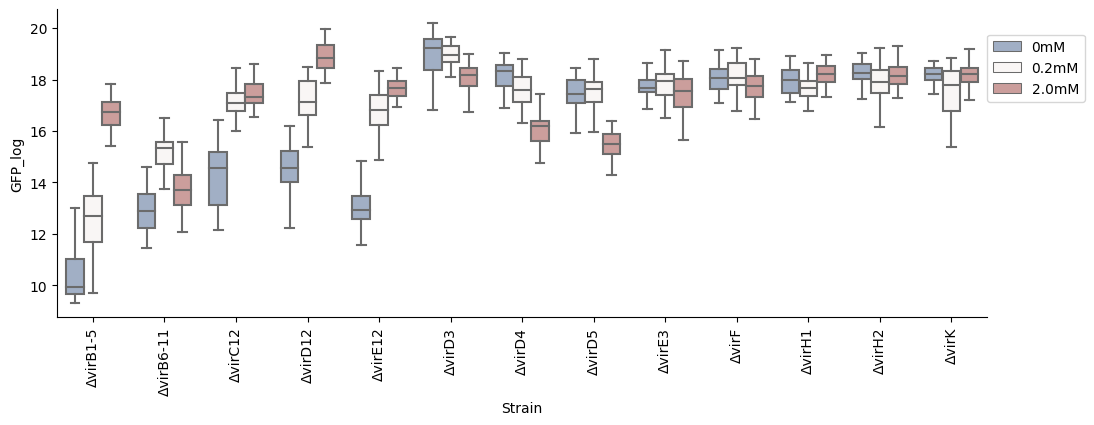

In [46]:
plt.figure(figsize=(12,4))
sns.boxplot(x="Strain", y="GFP_log",hue='Induction', data=dfB1S_plot,
            width=.75, palette="vlag",showfliers=False)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

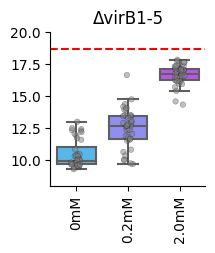

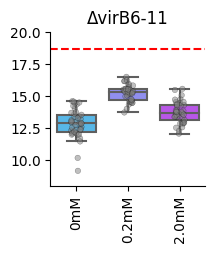

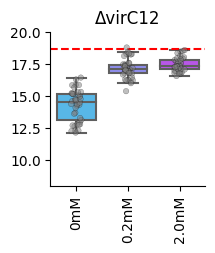

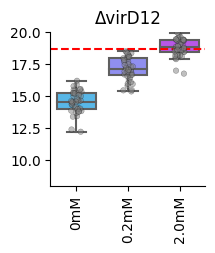

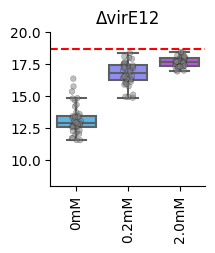

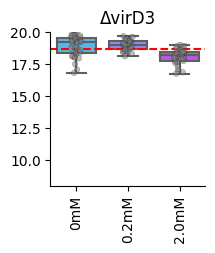

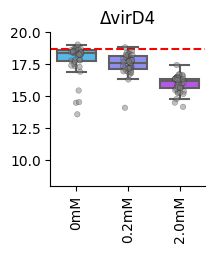

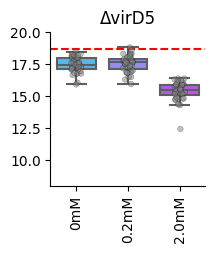

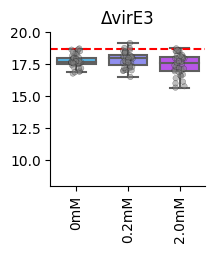

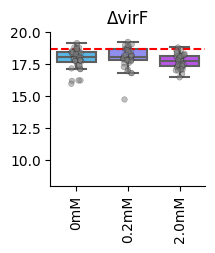

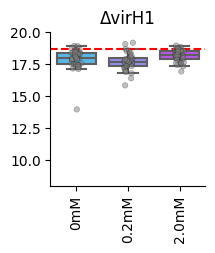

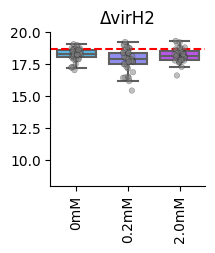

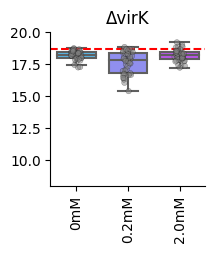

In [47]:
#plot the WT line
for strain in dfB1S_plot.Strain.unique():
    temp_df = dfB1S_plot[dfB1S_plot.Strain == strain]
    
    plt.figure(figsize=(2,2))
    sns.boxplot(x="Induction", y="GFP_log", data=temp_df,palette='cool',
            width=.75,showfliers=False)

    # Add in points to show each observation
    sns.stripplot(x="Induction", y="GFP_log", data=temp_df,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

    sns.despine(top=True, right=True)
    plt.legend(loc=(1,.7))
    plt.xticks(rotation=90)
    plt.axhline(y = np.log2(420344.7875), color = 'r', linestyle = 'dashed')
    plt.ylim(8,20)
    plt.title(strain)
    plt.legend(loc=(1,.7),)
    plt.xlabel('')
    plt.ylabel('',fontsize=15)
    plt.xticks(rotation=90)
    plt.ylim(8,20)
    plt.legend([],[], frameon=False)
#     plt.savefig('%s_agro_test.png'% strain,kind='png',dpi=300,bbox_inches='tight')

# constitutive complement for figure 2

In [48]:
dfcomp2 = pd.read_excel('2022.9.19 con comp.xlsx',sheet_name='data')
dfcomp2['GFP_log'] = dfcomp2.GFP.apply(np.log2)
dfcomp2['ID'] = dfcomp2.Strain + "_" + dfcomp2.Promoter

dfcomp2sum = rp.summary_cont(dfcomp2['GFP'].groupby(dfcomp2['ID']))
dfcomp2sum

,N,Mean,SD,SE,95% Conf.,Interval
ID,,,,,,
WT_p117,64,333645.8594,101861.5348,12732.6918,308201.6051,359090.1137
ΔvirB1-5_p100,64,77570.6562,45381.2753,5672.6594,66234.7510,88906.5615
ΔvirB1-5_p101,64,198356.6094,60290.7125,7536.3391,183296.4375,213416.7812
ΔvirB1-5_p117,64,59584.0000,21472.3125,2684.0391,54220.3759,64947.6241
ΔvirB6-11_p114,64,17539.5938,5178.4379,647.3047,16246.0585,18833.1290
ΔvirB6-11_p117,64,88400.8438,24379.5391,3047.4424,82311.0161,94490.6714
ΔvirC12_p100,64,167571.0000,62408.2050,7801.0256,151981.8942,183160.1058
ΔvirC12_p101,64,409004.6562,118255.5241,14781.9405,379465.3052,438544.0073
ΔvirC12_p111,64,121504.9062,54728.0065,6841.0008,107834.2570,135175.5555


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

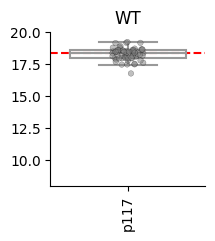

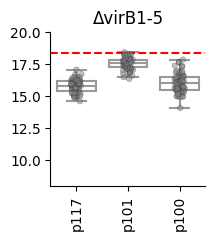

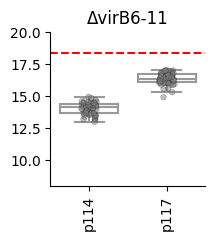

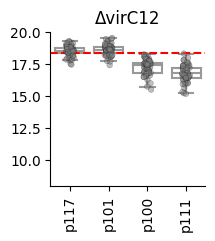

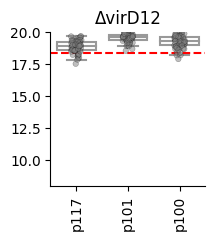

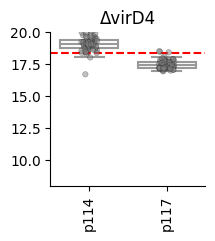

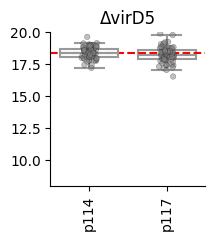

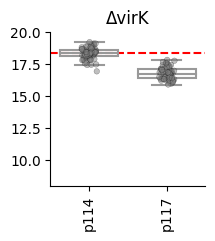

In [49]:
for strain in dfcomp2.Strain.unique():
    temp_df = dfcomp2[dfcomp2.Strain == strain]
    
    plt.figure(figsize=(2,2))
    sns.boxplot(x="Promoter", y="GFP_log", data=temp_df,
            width=.75,showfliers=False,color="white")

    # Add in points to show each observation
    sns.stripplot(x="Promoter", y="GFP_log", data=temp_df,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

    sns.despine(top=True, right=True)
    plt.legend(loc=(1,.7))
    plt.xticks(rotation=90)
    plt.ylim(8,20)
    plt.title(strain)
    plt.axhline(y = np.log2(333645.8594), color = 'r', linestyle = 'dashed')    
    plt.legend(loc=(1,.7),)
    plt.xlabel('')
    plt.ylabel('',fontsize=15)
    plt.xticks(rotation=90)
    plt.ylim(8,20)
    plt.legend([],[], frameon=False)
    plt.savefig('%s_agro_comp2.png'% strain,dpi=300,bbox_inches='tight')

# virC12 alleles

In [50]:
dfvirc = pd.read_excel('2022.9.5 virC12 alleles.xlsx',sheet_name='data')
dfvirc['GFP_log'] = dfvirc.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction

dfvircsum = rp.summary_cont(dfvirc['GFP'].groupby(dfvirc['Strain']))

compvirc = mc.MultiComparison(dfvirc['GFP'], dfvirc['Strain'])
tblvirc, a1virc, a2virc = compvirc.allpairtest(stats.ttest_ind, method= "bonf")

dfvircplot = dfvirc[dfvirc.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4',
       'T60', 'TiAB', 'TiBo'])]

my_virC_pal = {'A4': 'red',
 'Ach5': 'red',
 'B21': 'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey',
 'Q15': 'lightgrey',
 'pRi': 'red',
 'S4': 'yellow',
 'T60': 'red',
 'TiAB': 'red',
 'TiBo': 'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirC12 Allele')

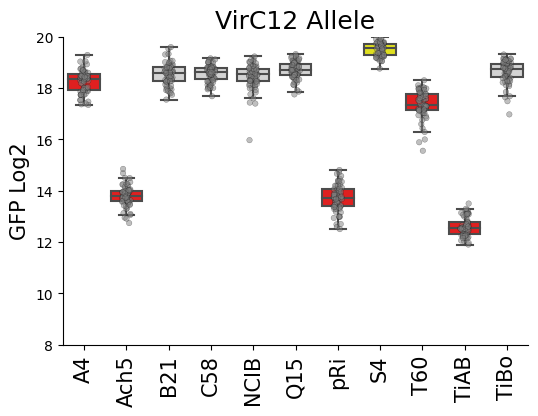

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfvircplot,palette=my_virC_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfvircplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirC12 Allele',size=18)
# plt.savefig('2022.9.23_virCallele.png',kind='png',dpi=300,bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


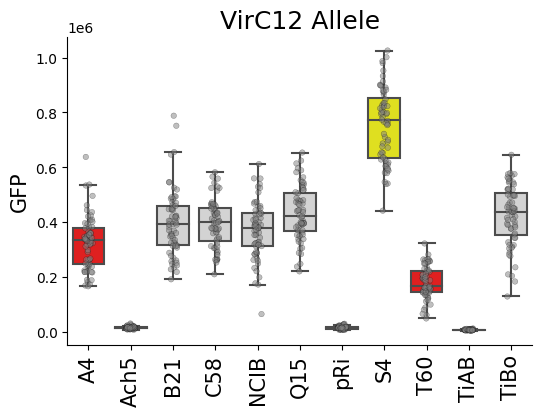

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvircplot,palette=my_virC_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvircplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirC12 Allele',size=18)
plt.savefig('2022.9.23_virCallelenolog.png',dpi=300,bbox_inches='tight')

# virD12 alleles

In [57]:
dfvird = pd.read_excel('2022.7.25 virD allele.xlsx',sheet_name='data')
dfvird['GFP_log'] = dfvird.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction

dfvirdsum=rp.summary_cont(dfvird['GFP'].groupby(dfvird['Strain']))

compvird = mc.MultiComparison(dfvird['GFP'], dfvird['Strain'])
tblvird, a1vird, a2vird = compvird.allpairtest(stats.ttest_ind, method= "bonf")
# print(tblvird)

dfvirdplot = dfvird[dfvird.Strain.isin(['A4', 'Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'pRi', 'S4',
       'T60', 'TiAB', 'TiBo'])]

my_virD_pal = {'A4': 'lightgrey',
 'Ach5': 'red',
 'B21': 'red',
 'C58': 'lightgrey',
 'NCIB': 'red',
 'Q15': 'red',
 'pRi': 'red',
 'S4': 'red',
 'T60': 'red',
 'TiAB': 'red',
 'TiBo': 'lightgrey'}
       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirD12 Allele')

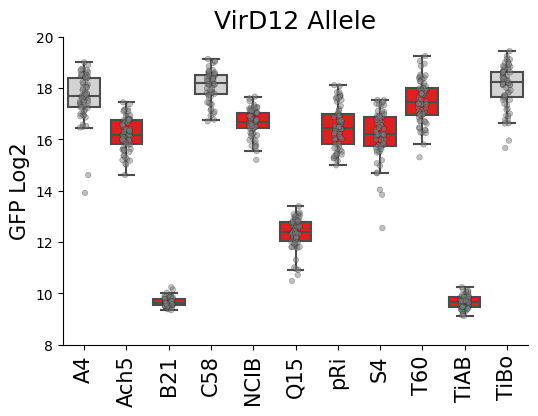

In [58]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfvirdplot,palette=my_virD_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfvirdplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirD12 Allele',size=18)
# plt.savefig('2022.9.23_virDallele.png',kind='png',dpi=300,bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


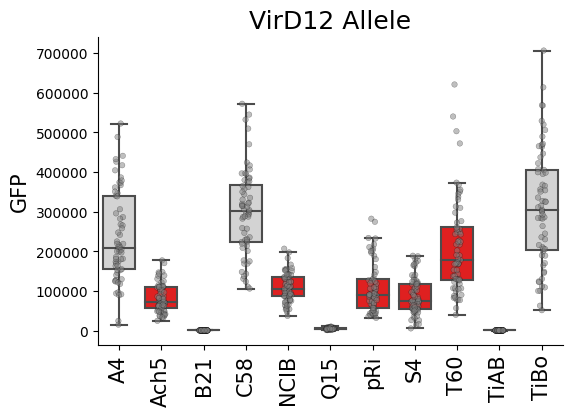

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvirdplot,palette=my_virD_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvirdplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirD12 Allele',size=18)
plt.savefig('2022.9.23_virD12allele_nolog.png',dpi=300,bbox_inches='tight')

In [60]:
dfvire = pd.read_excel('2022.9.12 virE12 allele.xlsx',sheet_name='data')
dfvire['GFP_log'] = dfvire.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction

dfviresum=rp.summary_cont(dfvire['GFP'].groupby(dfvire['Strain']))

compvire = mc.MultiComparison(dfvire['GFP'], dfvire['Strain'])
tblvire, a1vire, a2vire = compvire.allpairtest(stats.ttest_ind, method= "bonf")
# print(tblvire)

dfvireplot = dfvire[dfvire.Strain.isin(['Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4',
       'T60', 'TiAB', 'TiBo'])]

my_virE_pal = {
 'Ach5': 'red',
 'B21': 'red',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey',
 'Q15': 'red',
 'S4': 'red',
 'T60': 'red',
 'TiAB': 'red',
 'TiBo': 'red'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


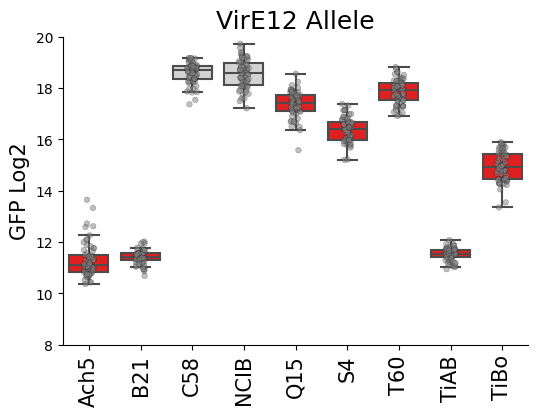

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfvireplot,palette=my_virE_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfvireplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirE12 Allele',size=18)
plt.savefig('2022.9.23_virEallele.png',dpi=300,bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


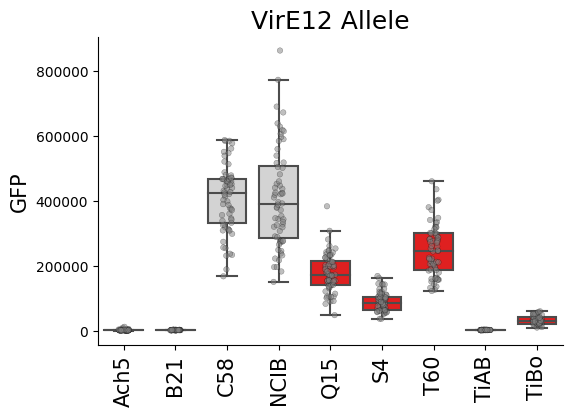

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvireplot,palette=my_virE_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvireplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirE12 Allele',size=18)
plt.savefig('2022.9.23_virE12allele_nolog.png',dpi=300,bbox_inches='tight')

In [63]:
dfvird4 = pd.read_excel('2022.10.17 vird4 allle.xlsx',sheet_name='data')
dfvird4['GFP_log'] = dfvird4.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction

dfvird4sum=rp.summary_cont(dfvird4['GFP'].groupby(dfvird4['Strain']))

compvird4 = mc.MultiComparison(dfvird4['GFP'], dfvird4['Strain'])
tblvird4, a1vird4, a2vird4 = compvird4.allpairtest(stats.ttest_ind, method= "bonf")
# print(tblvird4)

dfvird4plot = dfvird4[dfvird4.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4',
       'T60', 'TiAB', 'TiBo'])]

my_vird4_pal = {'A4':'red',
 'Ach5': 'red',
 'B21': 'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'red',
 'Q15': 'lightgrey',
 'S4': 'red',
 'T60': 'lightgrey',
 'TiAB': 'red',
 'TiBo': 'yellow'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirD4 Allele')

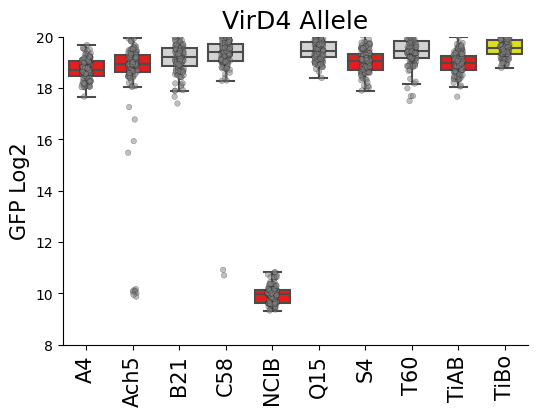

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP_log", data=dfvird4plot,palette=my_vird4_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log", data=dfvird4plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP Log2',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirD4 Allele',size=18)
#plt.savefig('2022.9.23_virD4allele.png',kind='png',dpi=300,bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirD4 Allele')

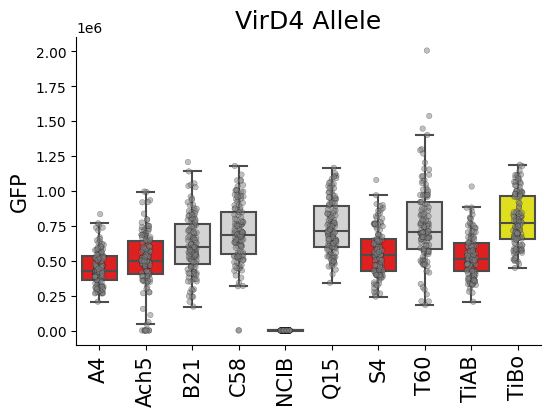

In [65]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvird4plot,palette=my_vird4_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvird4plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirD4 Allele',size=18)
# plt.savefig('2022.9.23_virD4allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

# virD5


In [66]:
dfvird5 = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virD5_data')
dfvird5['GFP_log'] = dfvird5.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction

dfvird5sum=rp.summary_cont(dfvird5['GFP'].groupby(dfvird5['Strain']))
compvird5 = mc.MultiComparison(dfvird5['GFP'], dfvird5['Strain'])
tblvird5, a1vird5, a2vird5 = compvird5.allpairtest(stats.ttest_ind, method= "bonf")
# print(tblvird5)

dfvird5plot = dfvird5[dfvird5.Strain.isin(['A4', 'B21', 'C58', 'NCIB', 'Q15', 'S4','pRi',
       'T60', 'TiAB', 'TiBo'])]

my_vird5_pal = {'A4':'yellow',
 'B21': 'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'yellow',
 'Q15': 'red',
 'S4': 'lightgrey',
 'T60': 'lightgrey',
 'TiAB': 'yellow',
 'TiBo': 'yellow','pRi':'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirD5 Allele')

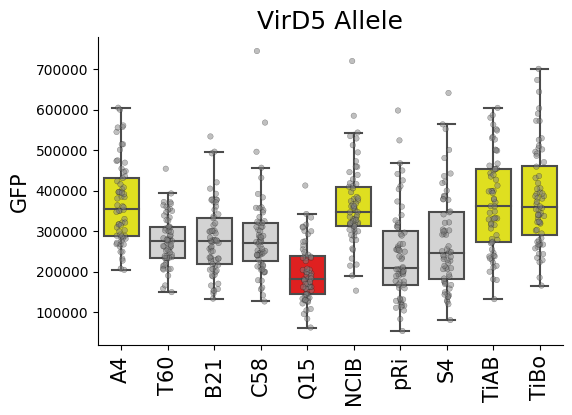

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvird5plot,palette=my_vird5_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvird5plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirD5 Allele',size=18)
# plt.savefig('2022.9.23_virD5allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

# virE3


In [68]:
dfvire3 = pd.read_excel('2022.11.7 virD5 virE3 alleles.xlsx',sheet_name='virE3_data')
dfvire3['GFP_log'] = dfvire3.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction

dfvire3sum=rp.summary_cont(dfvire3['GFP'].groupby(dfvire3['Strain']))

compvire3 = mc.MultiComparison(dfvire3['GFP'], dfvire3['Strain'])
tblvire3, a1vire3, a2vire3 = compvire3.allpairtest(stats.ttest_ind, method= "bonf")
# print(tblvire3)

dfvire3plot = dfvire3[dfvire3.Strain.isin(['A4','Ach5', 'B21', 'C58', 'NCIB', 'Q15', 'S4',
       'T60', 'TiAB', 'TiBo'])]

my_vire3_pal = {'A4':'red',
 'B21': 'yellow',
 'C58': 'lightgrey',
 'NCIB': 'yellow',
 'Q15': 'lightgrey',
 'S4': 'yellow',
 'T60': 'yellow',
 'TiAB': 'yellow',
 'TiBo': 'lightgrey','Ach5':'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirE3 Allele')

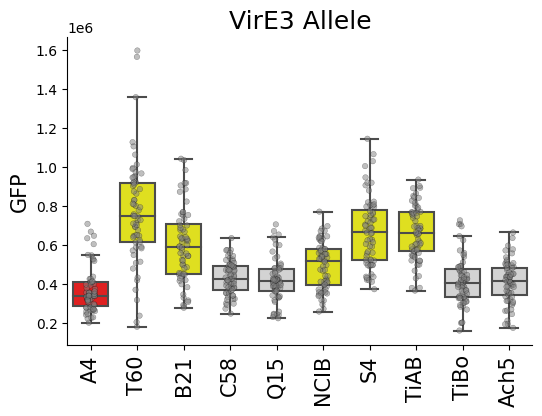

In [69]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvire3plot,palette=my_vire3_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvire3plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirE3 Allele',size=18)
# plt.savefig('2022.9.23_virE3allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

# virF


In [70]:
dfvirF = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataF')
dfvirF['GFP_log'] = dfvirF.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvirFsum=rp.summary_cont(dfvirF['GFP'].groupby(dfvirF['Strain']))
compvirF = mc.MultiComparison(dfvirF['GFP'], dfvirF['Strain'])
tblvirF, a1virF, a2virF = compvirF.allpairtest(stats.ttest_ind, method= "bonf")
# print(tblvirF)
dfvirFplot = dfvirF[dfvirF.Strain.isin(['A4', 'B21', 'C58', 'NCIB', ])]
my_virF_pal = {'A4':'lightgrey',
 'B21': 'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirF Allele')

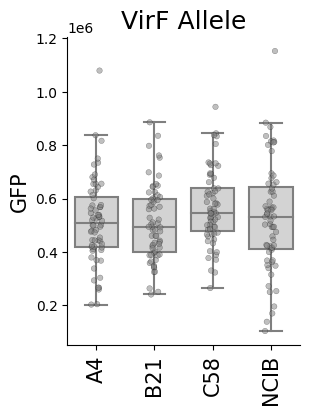

In [71]:
plt.figure(figsize=(3,4))
sns.boxplot(x="Strain", y="GFP", data=dfvirFplot,palette=my_virF_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvirFplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirF Allele',size=18)
# plt.savefig('2022.9.23_virFallele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

# virH1


In [72]:
dfvirH1 = pd.read_excel('2022.12.5 virF virH1.xlsx',sheet_name='dataH1')
dfvirH1['GFP_log'] = dfvirH1.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvirH1sum=rp.summary_cont(dfvirH1['GFP'].groupby(dfvirH1['Strain']))

compvirH1 = mc.MultiComparison(dfvirH1['GFP'], dfvirH1['Strain'])
tblvirH1, a1virH1, a2virH1 = compvirH1.allpairtest(stats.ttest_ind, method= "bonf")
# print(tblvirH1)

dfvirH1plot = dfvirH1[dfvirH1.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'S4','pRi',
       'T60', 'TiBo'])]

my_virH1_pal = {'A4':'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey',
 'Q15': 'lightgrey',
 'S4': 'red',
 'T60': 'red','pRi': 'red',
 'TiBo': 'red','Ach5':'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirH1 Allele')

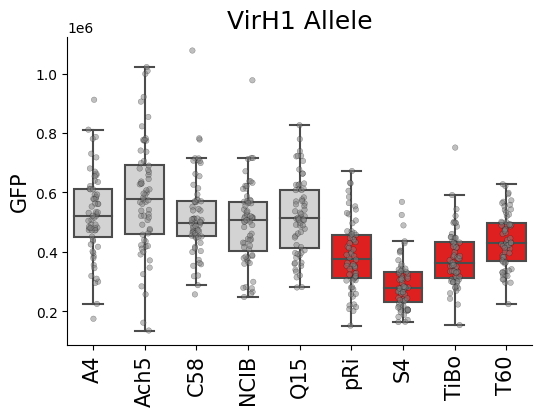

In [73]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvirH1plot,palette=my_virH1_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvirH1plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirH1 Allele',size=18)
# plt.savefig('2022.9.23_virH1allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

# virH2


In [75]:
dfvirH2 = pd.read_excel('2023.1.9 virH2 allele virH12 comp.xlsx',sheet_name='data')
dfvirH2['GFP_log'] = dfvirH2.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
dfvirH2 = dfvirH2[dfvirH2.Strain.isin(['WT','A4', 'Ach5', 'C58', 'NCIB', 'TiBo'])]

dfvirH2sum=rp.summary_cont(dfvirH2['GFP'].groupby(dfvirH2['Strain']))
compvirH2 = mc.MultiComparison(dfvirH2['GFP'], dfvirH2['Strain'])
tblvirH2, a1virH2, a2virH2 = compvirH2.allpairtest(stats.ttest_ind, method= "bonf")
# print(tblvirH2)

dfvirH2plot = dfvirH2[dfvirH2.Strain.isin(['A4','Ach5', 'C58', 'NCIB','TiBo'])]
my_virH2_pal = {'A4':'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey',
 'TiBo': 'lightgrey','Ach5':'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirH2 Allele')

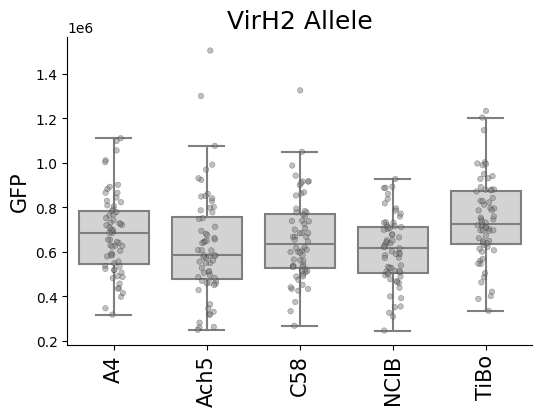

In [76]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvirH2plot,palette=my_virH2_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvirH2plot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirH2 Allele',size=18)
#plt.savefig('2022.9.23_virH1allele_nolog.png',kind='png',dpi=300,bbox_inches='tight')

# virB1-11


In [79]:
dfvirB = pd.read_excel('2023.2.6 virB allele.xlsx',sheet_name='data')
dfvirB['GFP_log'] = dfvirB.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction

dfvirBsum=rp.summary_cont(dfvirB['GFP'].groupby(dfvirB['Strain']))

compvirB = mc.MultiComparison(dfvirB['GFP'], dfvirB['Strain'])
tblvirB, a1virB, a2virB = compvirB.allpairtest(stats.ttest_ind, method= "bonf")
# print(tblvirB)

dfvirBplot = dfvirB[dfvirB.Strain.isin(['A4','Ach5', 'C58', 'NCIB', 'Q15', 'TiAB',
       'T60', 'TiBo'])]

my_virb_pal = {'A4': 'red',
 'Ach5': 'lightgrey','Q15': 'red','T60':'red','TiAB':'lightgrey',
 'C58': 'lightgrey',
 'NCIB': 'lightgrey',
 'TiBo': 'lightgrey'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VirB Allele')

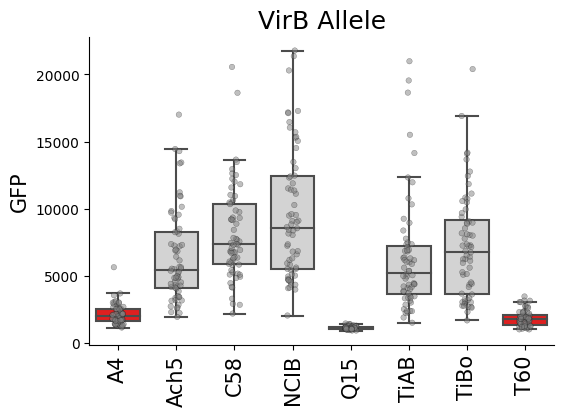

In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Strain", y="GFP", data=dfvirBplot,palette=my_virb_pal,
            width=.75,showfliers=False)

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP", data=dfvirBplot,
              size=4, edgecolor='black',linewidth=0.25,color='grey',alpha=.5)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)
plt.legend(loc=(1,.7),)
plt.xlabel('')
plt.ylabel('GFP',fontsize=15)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=15, rotation=90)
plt.title('VirB Allele',size=18)